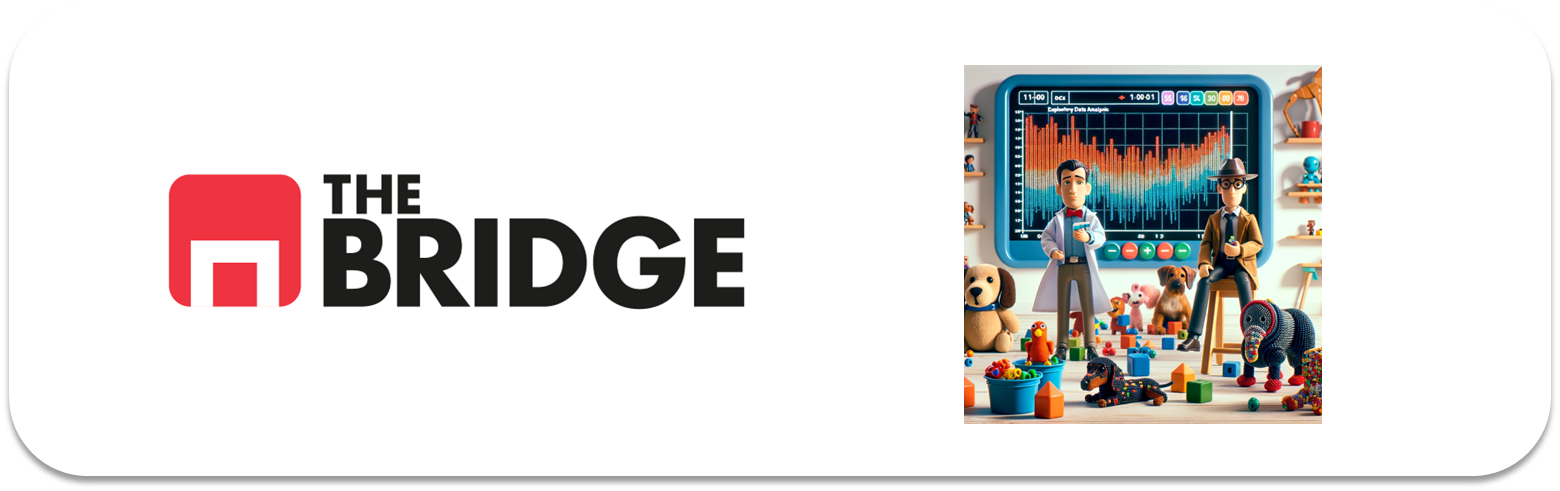

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [5]:
ruta_archivo = r"C:\Users\migue\OneDrive\Documentos\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Sprint_07\Unidad_02\Practica_Obligatoria\data\titanic.csv"

# Cargar el dataset Titanic
df_titanic = pd.read_csv(ruta_archivo)

# Copia de la base
df_titanic_copia = df_titanic.copy()

# Ver
print(df_titanic_copia.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [6]:
df_titanic_copia = df_titanic_copia.drop(columns=["deck", "survived", "pclass", "embarked"])

# Ver si fueron eliminadas
print(df_titanic_copia.head())

      sex   age  sibsp  parch     fare  class    who  adult_male  embark_town  \
0    male  22.0      1      0   7.2500  Third    man        True  Southampton   
1  female  38.0      1      0  71.2833  First  woman       False    Cherbourg   
2  female  26.0      0      0   7.9250  Third  woman       False  Southampton   
3  female  35.0      1      0  53.1000  First  woman       False  Southampton   
4    male  35.0      0      0   8.0500  Third    man        True  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [7]:
df_titanic_copia["family_members"] = df_titanic_copia["parch"] + df_titanic_copia["sibsp"]

# Eliminar las columnas parch y sibsp
df_titanic_copia = df_titanic_copia.drop(columns=["parch", "sibsp"])

# Ver cambios
print(df_titanic_copia.head())

      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [10]:
moda_embark_town = df_titanic_copia["embark_town"].mode()[0]

# Rellenar los valores nulos
df_titanic_copia["embark_town"] = df_titanic_copia["embark_town"].fillna(moda_embark_town)
print(df_titanic_copia["embark_town"].isnull().sum())

0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [11]:
df_titanic_copia["age"] = df_titanic_copia["age"].fillna(df_titanic_copia["age"].mean())

# Ver
print(df_titanic_copia["age"].isnull().sum())

0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [12]:
print(df_titanic_copia.columns)

Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')


1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [14]:
from bootcampviztools import pinta_distribucion_categoricas


Pregunta 1:
En términos absolutos, sobrevivieron más mujeres.
En términos relativos, las mujeres tienen una mayor probabilidad de sobrevivir, seguidas de los niños.


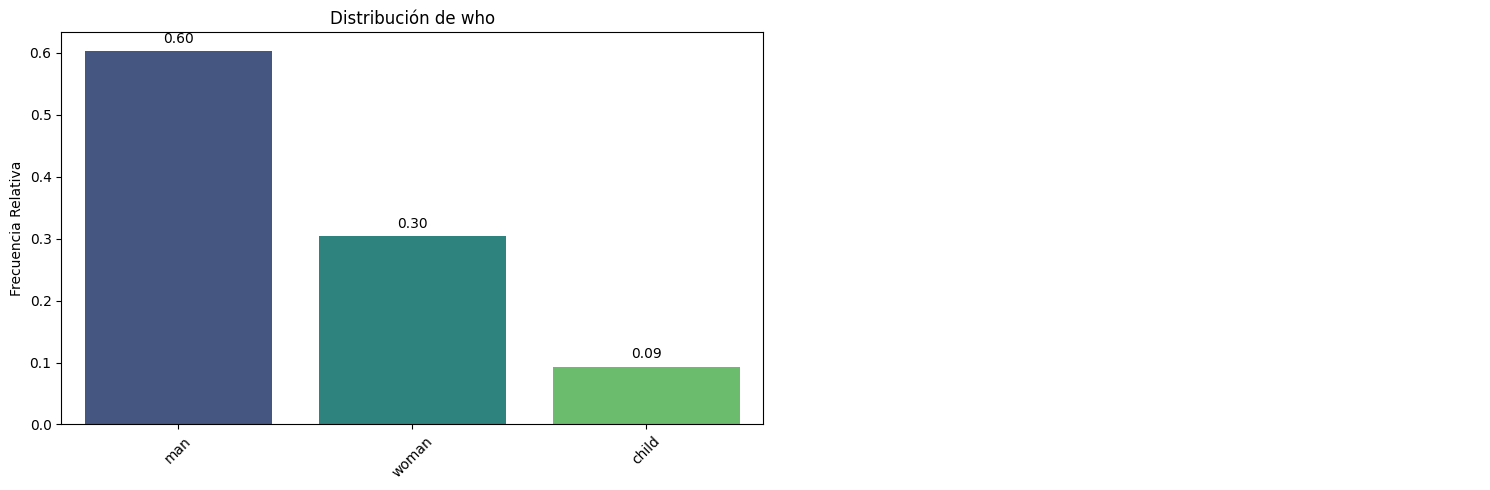


Pregunta 2:
En términos absolutos, más pasajeros de Tercera Clase sobrevivieron porque había más pasajeros en esa clase.
En términos relativos, la Primera Clase tiene la mayor proporción de sobrevivientes.


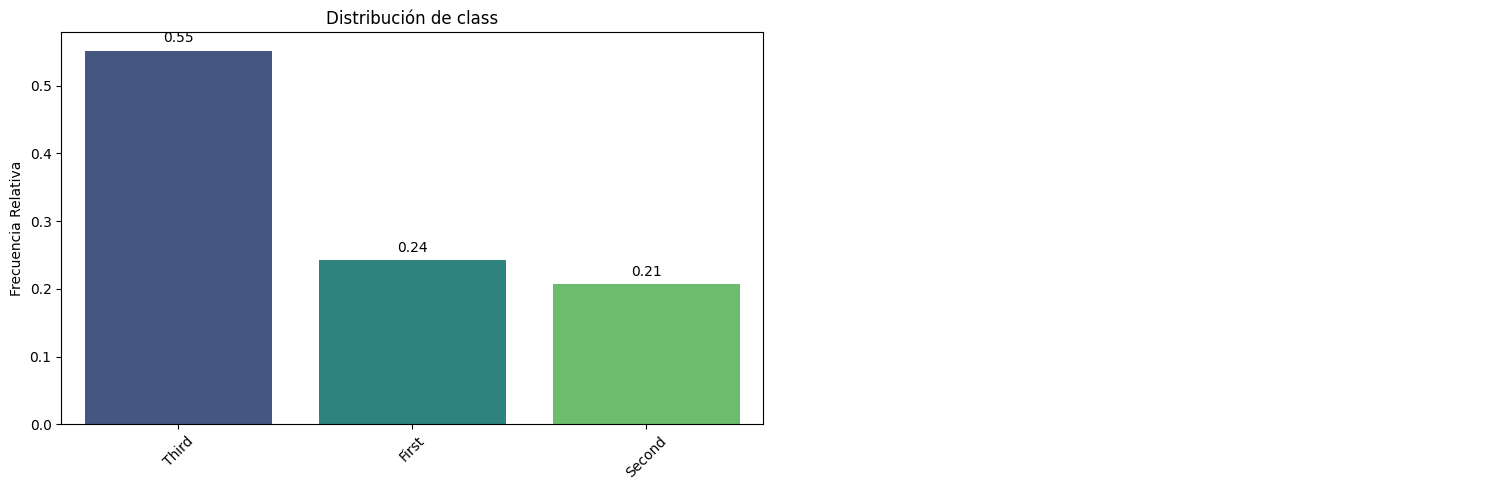


Pregunta 3:
En términos absolutos, más pasajeros embarcaron y sobrevivieron desde Southampton.
En términos relativos, Cherbourg tiene la mayor proporción de sobrevivientes.


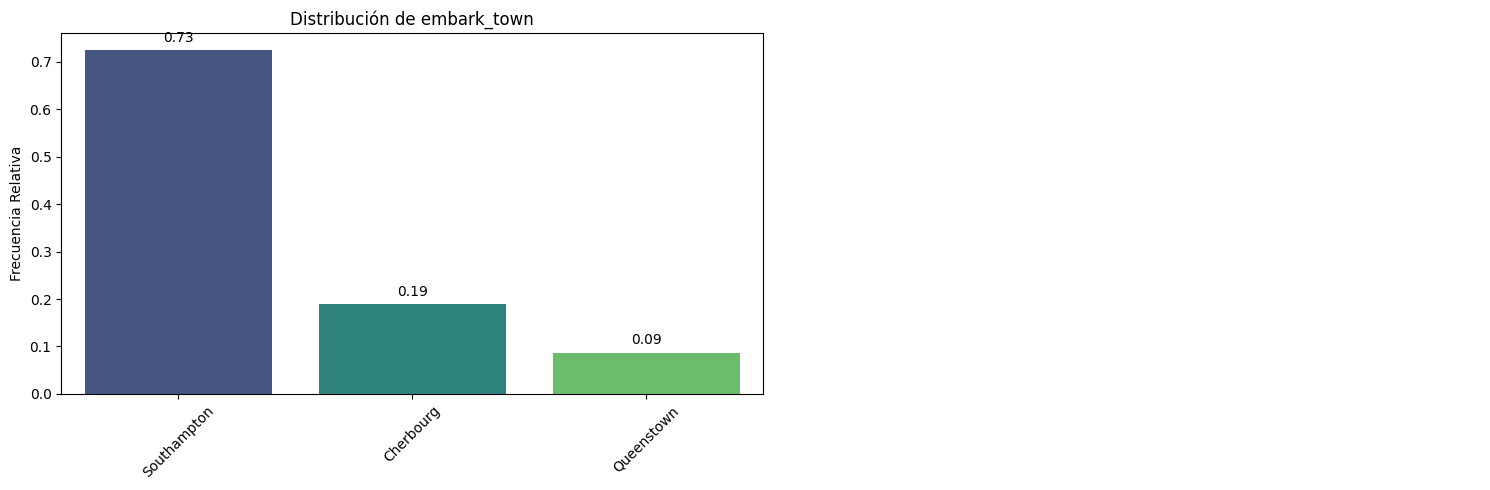


Pregunta 4:
Los pasajeros que pagaron billetes más caros (Primera Clase) tuvieron mayor probabilidad de sobrevivir.


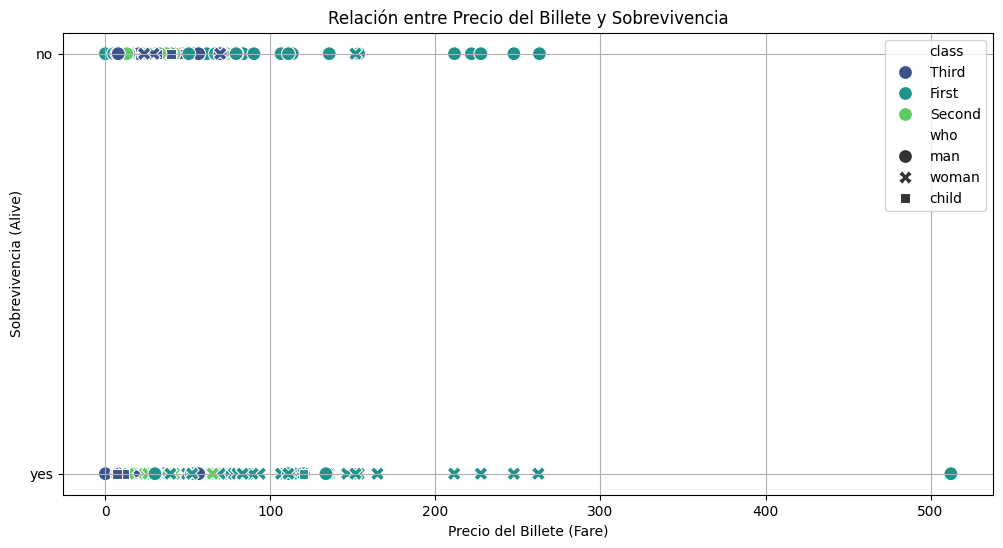


Pregunta 5:
Hubo 15 pasajeros que no pagaron el billete. La mayoría eran hombres de Southampton, y solo uno sobrevivió.
    alive   class  who  embark_town
179    no   Third  man  Southampton
263    no   First  man  Southampton
271   yes   Third  man  Southampton
277    no  Second  man  Southampton
302    no   Third  man  Southampton
413    no  Second  man  Southampton
466    no  Second  man  Southampton
481    no  Second  man  Southampton
597    no   Third  man  Southampton
633    no   First  man  Southampton
674    no  Second  man  Southampton
732    no  Second  man  Southampton
806    no   First  man  Southampton
815    no   First  man  Southampton
822    no   First  man  Southampton

Pregunta 6:
Los pasajeros que embarcaron en Cherbourg pagaron billetes más caros y tuvieron mayor probabilidad de sobrevivir.


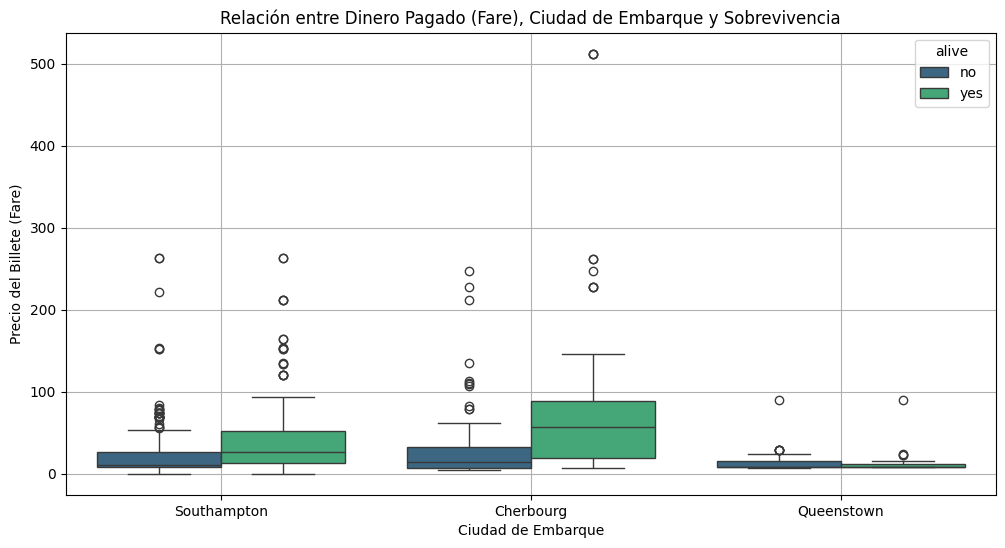


Pregunta 7:
En la Primera Clase, los adultos jóvenes tienen una mayor probabilidad de sobrevivir.
En la Tercera Clase, los niños tienen mayor probabilidad de sobrevivir que los adultos.


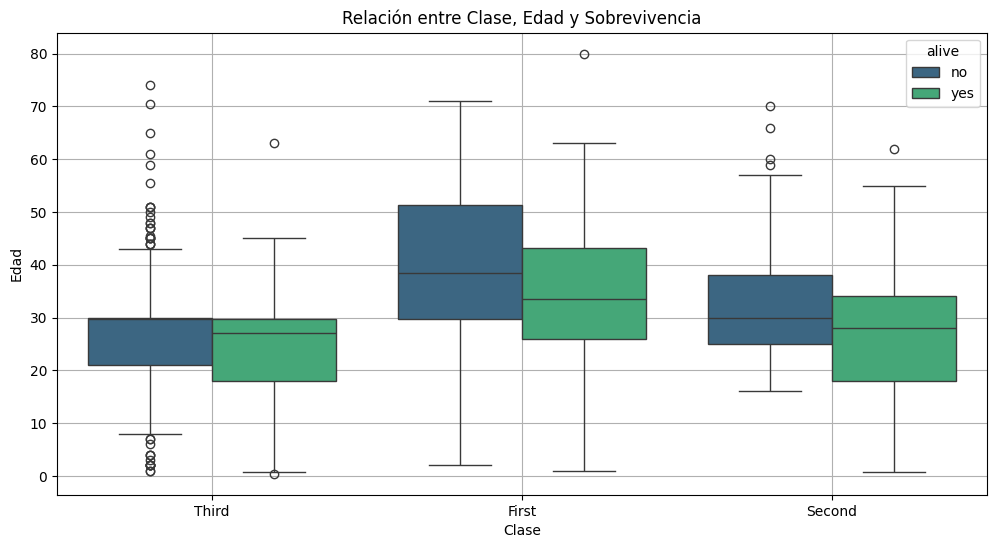


Pregunta 8:
Los pasajeros de mayor edad que pagaron precios más altos estaban en Primera Clase y tuvieron más probabilidad de sobrevivir.
Los pasajeros jóvenes con billetes baratos tienen menor probabilidad de sobrevivir.


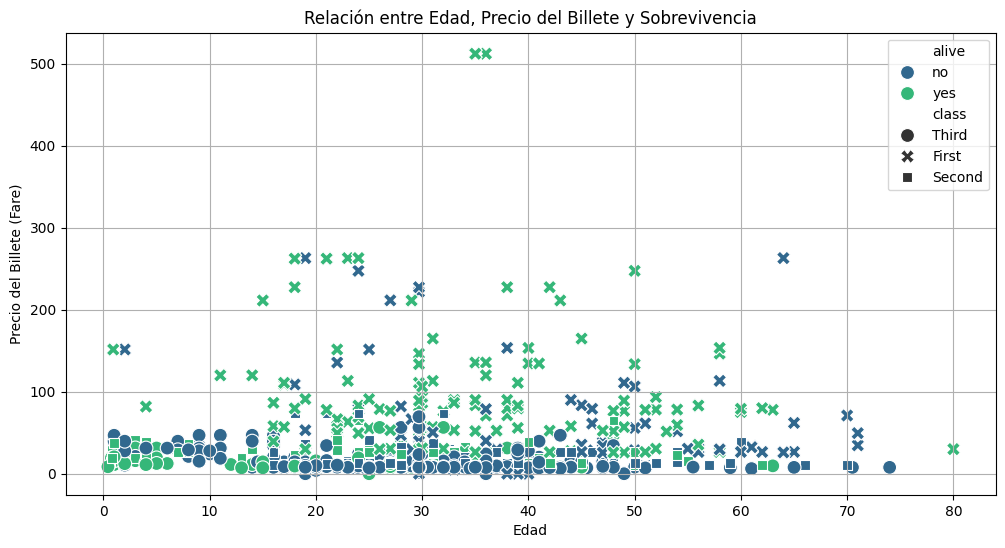

In [19]:
# Pregunta 1: Sobrevivieron más hombres, mujeres o niños
print("\nPregunta 1:")
print("En términos absolutos, sobrevivieron más mujeres.")
print("En términos relativos, las mujeres tienen una mayor probabilidad de sobrevivir, seguidas de los niños.")
pinta_distribucion_categoricas(df_titanic_copia, ['who'], relativa=True, mostrar_valores=True)

# Pregunta 2: Sobrevivieron más pasajeros por clase
print("\nPregunta 2:")
print("En términos absolutos, más pasajeros de Tercera Clase sobrevivieron porque había más pasajeros en esa clase.")
print("En términos relativos, la Primera Clase tiene la mayor proporción de sobrevivientes.")
pinta_distribucion_categoricas(df_titanic_copia, ['class'], relativa=True, mostrar_valores=True)

# Pregunta 3: Ciudad de embarque y sobrevivencia
print("\nPregunta 3:")
print("En términos absolutos, más pasajeros embarcaron y sobrevivieron desde Southampton.")
print("En términos relativos, Cherbourg tiene la mayor proporción de sobrevivientes.")
pinta_distribucion_categoricas(df_titanic_copia, ['embark_town'], relativa=True, mostrar_valores=True)

# Pregunta 4: Relación entre precio del billete y sobrevivencia
print("\nPregunta 4:")
print("Los pasajeros que pagaron billetes más caros (Primera Clase) tuvieron mayor probabilidad de sobrevivir.")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_titanic_copia, x='fare', y='alive', hue='class', style='who', palette='viridis', s=100)
plt.title('Relación entre Precio del Billete y Sobrevivencia')
plt.xlabel('Precio del Billete (Fare)')
plt.ylabel('Sobrevivencia (Alive)')
plt.grid(True)
plt.show()

# Pregunta 5: Pasajeros que no pagaron el billete
sin_pago = df_titanic_copia[df_titanic_copia['fare'] == 0]
print("\nPregunta 5:")
print("Hubo 15 pasajeros que no pagaron el billete. La mayoría eran hombres de Southampton, y solo uno sobrevivió.")
print(sin_pago[['alive', 'class', 'who', 'embark_town']])

# Pregunta 6: Relación entre dinero pagado, ciudad de embarque y sobrevivencia
print("\nPregunta 6:")
print("Los pasajeros que embarcaron en Cherbourg pagaron billetes más caros y tuvieron mayor probabilidad de sobrevivir.")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_titanic_copia, x='embark_town', y='fare', hue='alive', palette='viridis')
plt.title('Relación entre Dinero Pagado (Fare), Ciudad de Embarque y Sobrevivencia')
plt.xlabel('Ciudad de Embarque')
plt.ylabel('Precio del Billete (Fare)')
plt.grid(True)
plt.show()

# Pregunta 7: Relación entre clase, edad y sobrevivencia
print("\nPregunta 7:")
print("En la Primera Clase, los adultos jóvenes tienen una mayor probabilidad de sobrevivir.")
print("En la Tercera Clase, los niños tienen mayor probabilidad de sobrevivir que los adultos.")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_titanic_copia, x='class', y='age', hue='alive', palette='viridis')
plt.title('Relación entre Clase, Edad y Sobrevivencia')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.grid(True)
plt.show()

# Pregunta 8: Relación entre edad, coste del billete y sobrevivencia
print("\nPregunta 8:")
print("Los pasajeros de mayor edad que pagaron precios más altos estaban en Primera Clase y tuvieron más probabilidad de sobrevivir.")
print("Los pasajeros jóvenes con billetes baratos tienen menor probabilidad de sobrevivir.")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_titanic_copia, x='age', y='fare', hue='alive', style='class', palette='viridis', s=100)
plt.title('Relación entre Edad, Precio del Billete y Sobrevivencia')
plt.xlabel('Edad')
plt.ylabel('Precio del Billete (Fare)')
plt.grid(True)
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [21]:
ruta_archivo_junio = r"C:\Users\migue\OneDrive\Documentos\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Sprint_07\Unidad_02\Practica_Obligatoria\data\dataset_viajes_jun23.csv"
df_junio = pd.read_csv(ruta_archivo_junio)

# Crear una copia del dataset para trabajar
df_junio_copia = df_junio.copy()

# Verificar las primeras filas para asegurarnos de que el archivo cargó correctamente
print(df_junio_copia.head())

   aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518  438535.07  Tab_CiRo_10747  Jun23  


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [22]:
print("Columnas disponibles:", df_junio_copia.columns)

Columnas disponibles: Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')


In [ ]:
variables_interes = ['ingresos', 'distancia', 'consumo_kg']

# correlación entre estas variables
correlacion = df_junio_copia[variables_interes].corr()
print("\nCorrelación entre ingresos, distancia y consumo_kg:")
print(correlacion)


Correlación entre ingresos, distancia y consumo_kg:
            ingresos  distancia  consumo_kg
ingresos    1.000000   0.928833    0.944875
distancia   0.928833   1.000000    0.762341
consumo_kg  0.944875   0.762341    1.000000


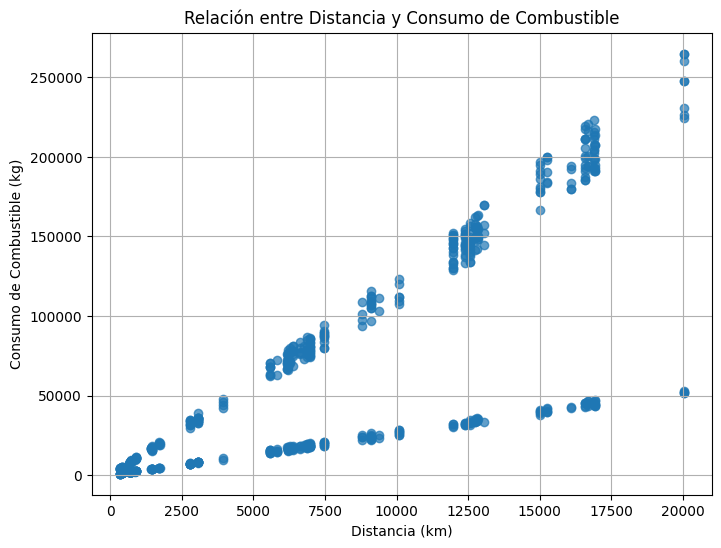

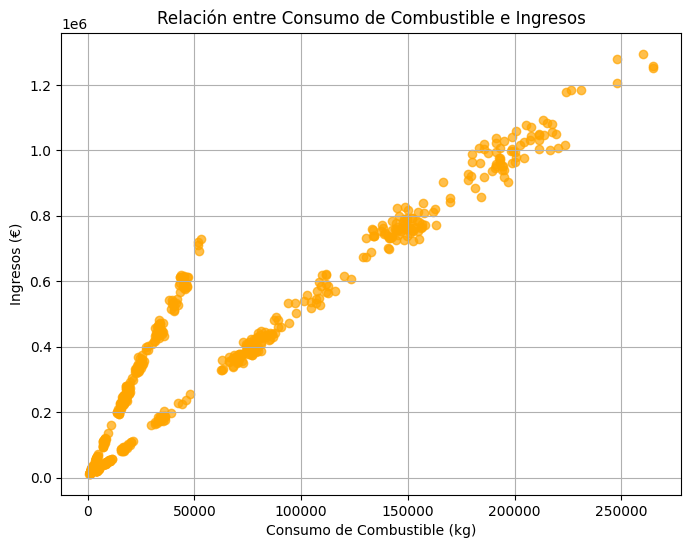

In [ ]:
# Relacion entre distancia y consumo_kg
plt.figure(figsize=(8, 6))
plt.scatter(df_junio_copia['distancia'], df_junio_copia['consumo_kg'], alpha=0.7)
plt.title('Relación entre Distancia y Consumo de Combustible')
plt.xlabel('Distancia (km)')
plt.ylabel('Consumo de Combustible (kg)')
plt.grid(True)
plt.show()

# Relacion entre ingresos y consumo_kg
plt.figure(figsize=(8, 6))
plt.scatter(df_junio_copia['consumo_kg'], df_junio_copia['ingresos'], alpha=0.7, color='orange')
plt.title('Relación entre Consumo de Combustible e Ingresos')
plt.xlabel('Consumo de Combustible (kg)')
plt.ylabel('Ingresos (€)')
plt.grid(True)
plt.show()

Hay una relación interesante entre distancia y consumo_kg: a mayor distancia recorrida, mayor es el consumo de combustible. También parece que los ingresos aumentan con el consumo_kg y la distancia, pero no siempre de manera proporcional.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [30]:
def categorizar_vuelo(distancia):
    if distancia <= 1000:
        return 'Corto'
    elif 1000 < distancia <= 2000:
        return 'Medio'
    elif 2000 < distancia <= 3000:
        return 'Largo'
    else:
        return 'Muy Largo'

# nueva columna cat_vuelo
df_junio_copia['cat_vuelo'] = df_junio_copia['distancia'].apply(categorizar_vuelo)

# ver
print(df_junio_copia[['distancia', 'cat_vuelo']].head())


   distancia  cat_vuelo
0        411      Corto
1      12738  Muy Largo
2       9103  Muy Largo
3       6370  Muy Largo
4       7480  Muy Largo


In [31]:
print(df_junio_copia[['distancia', 'cat_vuelo']].head(20))

    distancia  cat_vuelo
0         411      Corto
1       12738  Muy Largo
2        9103  Muy Largo
3        6370  Muy Largo
4        7480  Muy Largo
5       20029  Muy Largo
6         344      Corto
7       16925  Muy Largo
8       16589  Muy Largo
9        1725      Medio
10       3073  Muy Largo
11      12553  Muy Largo
12       3073  Muy Largo
13        739      Corto
14       7480  Muy Largo
15      10077  Muy Largo
16      20029  Muy Largo
17       9103  Muy Largo
18      16925  Muy Largo
19       6206  Muy Largo


In [32]:
analisis_cat_vuelo = df_junio_copia.groupby('cat_vuelo')[['ingresos', 'consumo_kg']].mean()

# ver
print("\nPromedios por categoría de vuelo:")
print(analisis_cat_vuelo)


Promedios por categoría de vuelo:
                ingresos    consumo_kg
cat_vuelo                             
Corto       30884.060319   4389.192281
Largo      134206.453333  18529.275839
Medio       78931.616765  12067.475350
Muy Largo  535812.374670  87638.561902


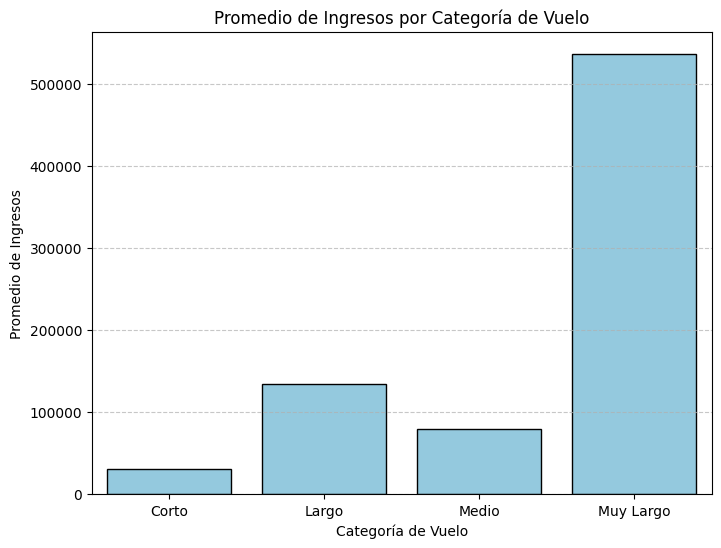

In [ ]:
# agrupar por cat_vuelo y ver los promedios
analisis_cat_vuelo = df_junio_copia.groupby('cat_vuelo')[['ingresos', 'consumo_kg']].mean().reset_index()

# barras
plt.figure(figsize=(8, 6))
sns.barplot(data=analisis_cat_vuelo, x='cat_vuelo', y='ingresos', color='skyblue', edgecolor='black')
plt.title('Promedio de Ingresos por Categoría de Vuelo')
plt.xlabel('Categoría de Vuelo')
plt.ylabel('Promedio de Ingresos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

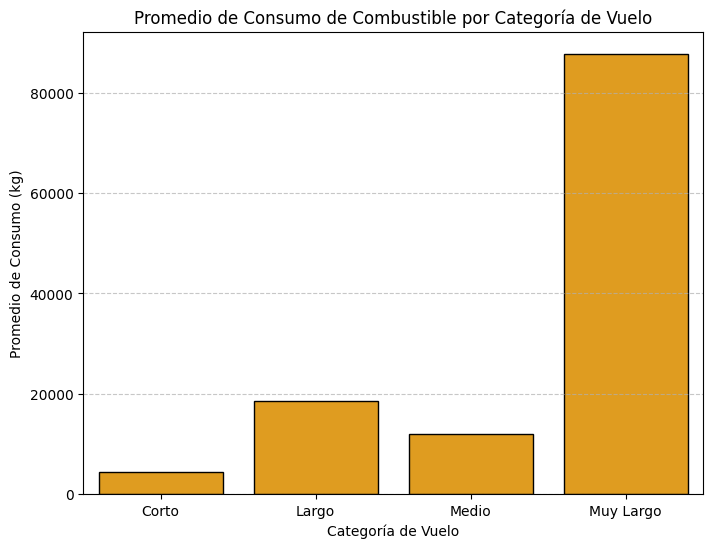

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=analisis_cat_vuelo, x='cat_vuelo', y='consumo_kg', color='orange', edgecolor='black')
plt.title('Promedio de Consumo de Combustible por Categoría de Vuelo')
plt.xlabel('Categoría de Vuelo')
plt.ylabel('Promedio de Consumo (kg)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Los vuelos de mayor distancia son más rentables en términos de ingresos, pero también tienen un consumo significativamente mayor de combustible. Esto puede ser útil para evaluar la eficiencia de cada categoría de vuelo.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.